In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("NLP_train.csv")
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


NO NULL values, but there are many special or non-alphanumeric characters in the tweet column

In [4]:
# First identifying if there are any duplicates in whole dataframe and dropping the values
df.duplicated().sum()

0

There are no duplicate values as well

In [5]:
# Second, converting the data into lower case. Since tweet is the only text column:
df['tweet'] = df['tweet'].apply(lambda x: x.lower())
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


(array([29720.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  2242.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

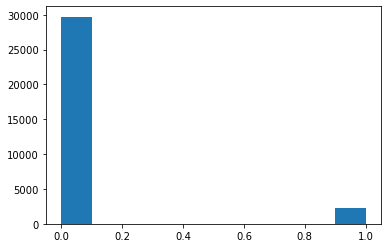

In [6]:
plt.hist(df['label'])

In [7]:
# Removing non-alphanumeric characters using regex
import re
df['tweet'] = df['tweet'].apply(lambda x: re.sub(r'[^\w\s]+', ' ', x))

#Removing the charcaters like, ðÃ¤Â½Ã©Ã¥Â…Ã¦ from the tweet column
df['tweet'] = df['tweet'].apply(lambda x: x.encode('iso-8859-1').decode('utf-8', 'ignore'))                                
df

# import nltk
# from nltk.stem import WordNetLemmatizer
# lemmatizer = WordNetLemmatizer()
# df['tweet'] = df['tweet'].apply(lambda x: lemmatizer.lemmatize(x))

,id,label,tweet
0,1,0,user when a father is dysfunctional and is s...
1,2,0,user user thanks for lyft credit i can t us...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in ...
4,5,0,factsguide society now motivation
...,...,...,...
31957,31958,0,ate user isz that youuu
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,user sikh temple vandalised in in calgary ...


Now the data is fully cleaned with only alphanumeric and without any special characters

##### Since the test data has no instances of target variable, in order to test the model, splitting the train dataset into training and evaluation dataset

In [8]:
df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

The target class ie.'label' is unbalanced

In [9]:
X, y = df['tweet'], df['label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Using the Bag-of-words technique with Countvectorizer

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
# Creating a CountVectorizer object
vectorizer = CountVectorizer(stop_words='english')
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_vect, y_train)

LogisticRegression(max_iter=1000)

In [12]:
lr.score(X_train_vect, y_train)

0.984590715319332

In [13]:
lr.score(X_test_vect, y_test)

0.9594869388393555

In [14]:
y_pred = lr.predict(X_test_vect)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5937
           1       0.85      0.53      0.65       456

    accuracy                           0.96      6393
   macro avg       0.91      0.76      0.81      6393
weighted avg       0.96      0.96      0.96      6393

[[5893   44]
 [ 215  241]]


In [15]:
from sklearn.metrics import f1_score, precision_score, recall_score
print(f1_score(y_test, y_pred))

0.6504723346828611


In [16]:
print(precision_score(y_test, y_pred))

0.8456140350877193


In [17]:
print(recall_score(y_test, y_pred))

0.5285087719298246


In [18]:
X, y = df['tweet'], df['label']
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#from sklearn.feature_extraction.text import CountVectorizer
# Creating a CountVectorizer object
vectorizer_rf = CountVectorizer(stop_words='english')
X_train_vect_rf = vectorizer_rf.fit_transform(X_train)
X_test_vect_rf = vectorizer_rf.transform(X_test)

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_vect_rf, y_train)

RandomForestClassifier()

In [20]:
rf.score(X_train_vect_rf, y_train)

0.9997653408424264

In [21]:
rf.score(X_test_vect_rf, y_test)

0.9593305177537932

In [22]:
y_pred_rf = rf.predict(X_test_vect_rf)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5937
           1       0.89      0.49      0.63       456

    accuracy                           0.96      6393
   macro avg       0.93      0.74      0.81      6393
weighted avg       0.96      0.96      0.95      6393

[[5909   28]
 [ 232  224]]


In [23]:
from sklearn.metrics import f1_score, precision_score, recall_score
print(f1_score(y_test, y_pred_rf))

0.632768361581921


In [24]:
print(precision_score(y_test, y_pred_rf))

0.8888888888888888


In [25]:
print(recall_score(y_test, y_pred_rf))

0.49122807017543857
